<a href="https://colab.research.google.com/github/rohan-dot/Startups-Funding/blob/main/Rohan_Datta_Purkayastha_Team_4_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g5RpLmCxlc2FIziGkzKwfZToxTCiD_9LRBBcSE7AKcuk8b5eo5cN-8
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 5/Week 1/Day 1/data_driven_investment_1.csv')

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


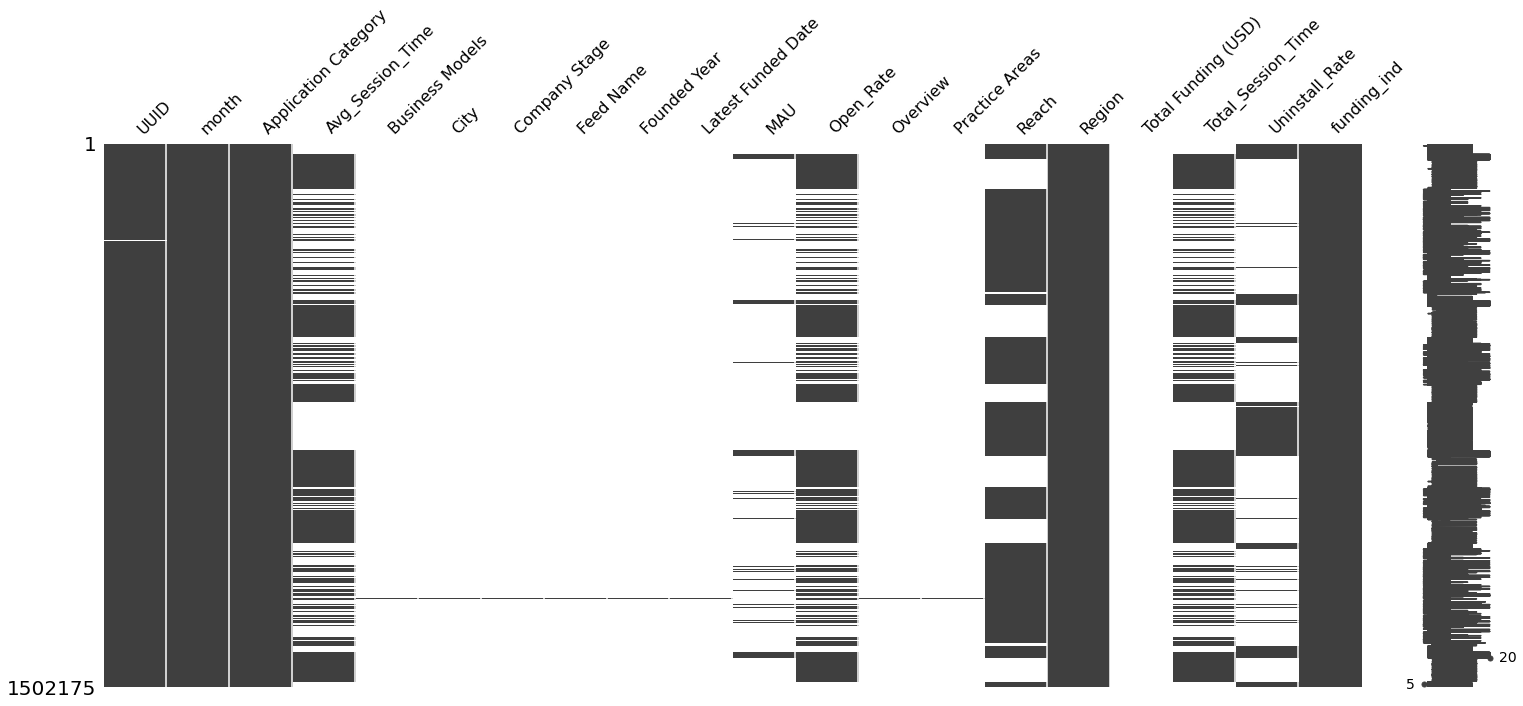

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.isnull().sum()

# We see a lot of missing values

In [ ]:
df['Business Models'].value_counts()

In [ ]:
df[~df['Business Models'].isna()]['City'].isnull().sum()

7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


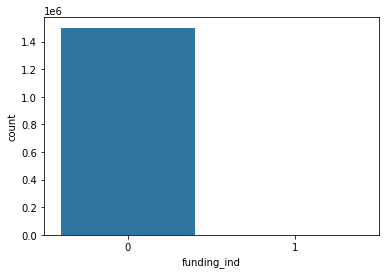

In [ ]:
sns.countplot(df['funding_ind'])

In [ ]:
df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [ ]:
df['Region'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


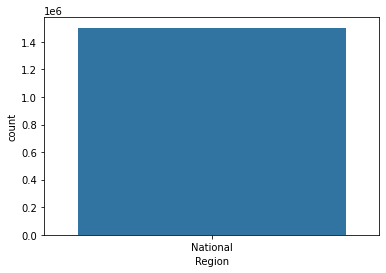

In [ ]:
sns.countplot(df['Region'])

# So, Region column contains only a single value i.e National

In [ ]:
df.drop('Region', axis = 1, inplace = True)

In [ ]:
df['month'].value_counts()

20200301    291864
20200401    269271
20200601    163918
20200501    153682
20200201    104186
20200101    102074
20191201     96524
20191101     82189
20191001     16080
20190901     16080
20190801     16080
20190701     16080
20190601     15954
20190501     15803
20190401     15556
20190301     15266
20190201     14970
20190101     14719
20181201     14402
20181101     14142
20181001     13810
20180901     13539
20180801     13226
20180701     12760
Name: month, dtype: int64

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [ ]:
df.dtypes

UUID                     object
month                     int64
Application Category     object
Avg_Session_Time        float64
Business Models          object
City                     object
Company Stage            object
Feed Name                object
Founded Year            float64
Latest Funded Date       object
MAU                     float64
Open_Rate               float64
Overview                 object
Practice Areas           object
Reach                   float64
Total Funding (USD)     float64
Total_Session_Time      float64
Uninstall_Rate          float64
funding_ind               int64
dtype: object

In [ ]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
df['Month'] = df['month'].astype('string').apply(lambda x: (str(x)[4:6]))

In [ ]:
df['Month'] = df['Month'].astype('int')

In [ ]:
import datetime

In [ ]:
df['Month_Name'] = df['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

In [ ]:
df['Month_Name']

0          Aug
1          Aug
2          Aug
3          Aug
4          Aug
          ... 
1502170    Jan
1502171    Jan
1502172    Jan
1502173    Jan
1502174    Jan
Name: Month_Name, Length: 1502175, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


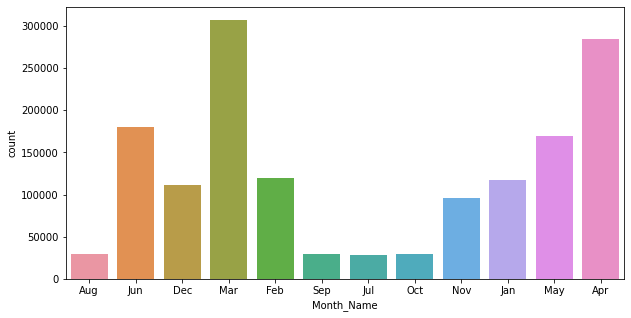

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['Month_Name'])

# We have app datas mostly from March month

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(df['Application Category'])

In [ ]:
df[~df['Avg_Session_Time'].isna()]['Avg_Session_Time']

29180      0.948620
29181      1.285343
29182      2.742948
29183      1.040757
29184      0.531213
             ...   
1487446    0.522869
1487447    0.374176
1487448    0.940800
1487449    0.361347
1487450    1.346300
Name: Avg_Session_Time, Length: 877732, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Avg_Session_Time'].dropna())

In [ ]:
df['Company Stage'].unique()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


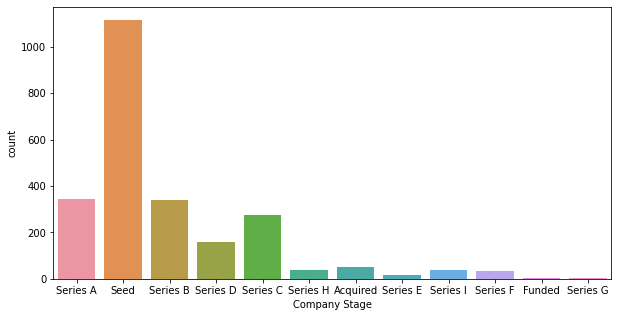

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['Company Stage'].dropna())

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(df['City'].dropna())

In [ ]:
df['Feed Name'].unique()

In [ ]:
df['Business Models'].unique()

# Business models and feed name are similar feature which are explaining the type of business.

In [ ]:
df['Founded Year'].unique()

In [ ]:
df['Founded Year'].dtype

dtype('float64')

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(df['Founded Year'].dropna())

In [ ]:
funded_df = df[df['funding_ind']==1]
not_funded_df = df[df['funding_ind']==0]

In [ ]:
import missingno as msno
msno.matrix(funded_df)

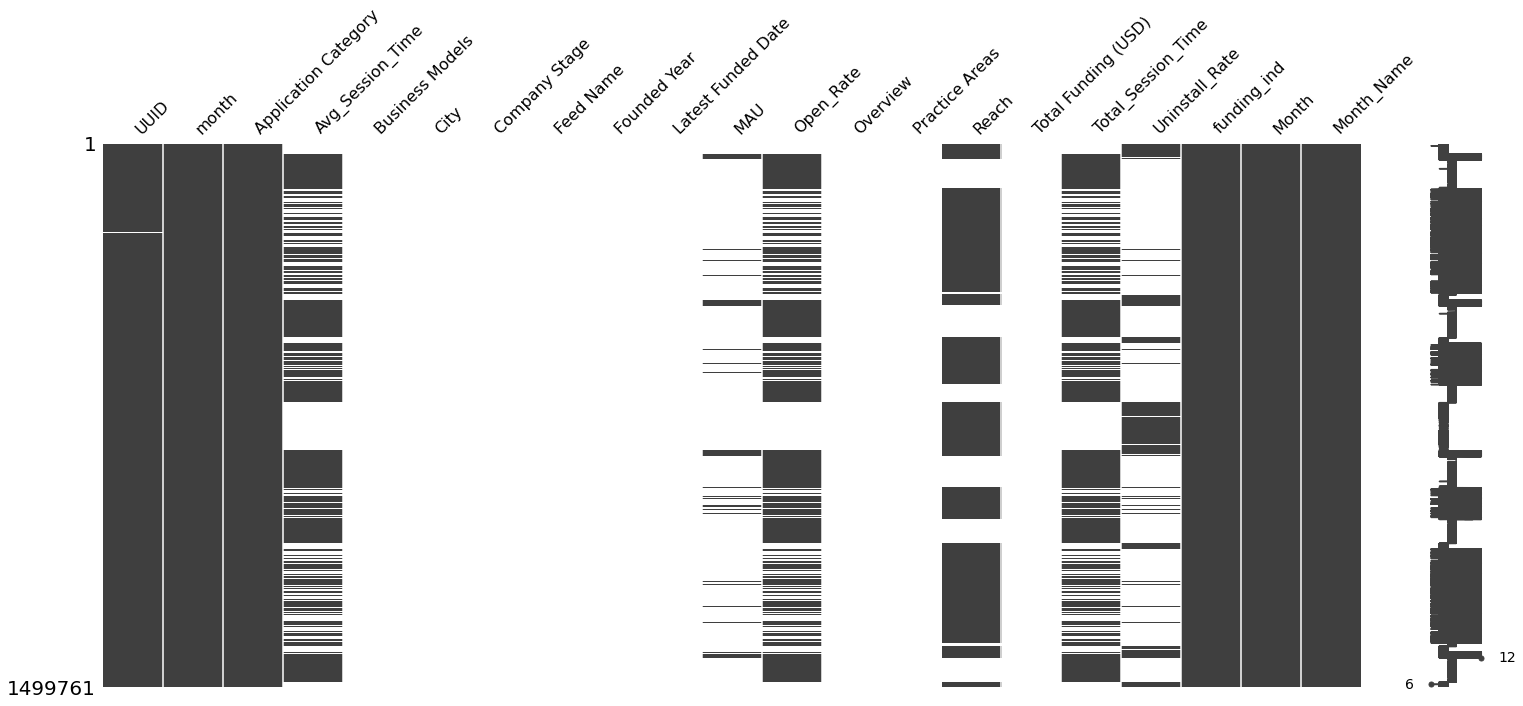

In [ ]:
import missingno as msno
msno.matrix(not_funded_df)

In [ ]:
not_funded_df[~not_funded_df['Uninstall_Rate'].isna()]

In [ ]:
len(not_funded_df)

In [ ]:
not_funded_df.isnull().sum()

In [ ]:
not_funded_df.drop(['Business Models',
'City',
'Company Stage','Feed Name',
'Founded Year',
'Latest Funded Date',
'MAU',
'Overview',
'Practice Areas','Total Funding (USD)'
], axis = 1, inplace = True)

In [ ]:
import missingno as msno
msno.matrix(not_funded_df)

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0,8,Aug
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0,8,Aug
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0,8,Aug
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0,8,Aug
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0,8,Aug


# Lets analyse for a single startup

In [ ]:
funded_df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,4087427.0,NaN,0.250000,1,8,Aug
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,4473029.0,NaN,0.274336,1,8,Aug
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,1220353.0,NaN,0.333333,1,8,Aug
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,1156045.0,NaN,NaN,1,8,Aug
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,34444.0,NaN,0.100000,1,8,Aug


In [ ]:
df[df['UUID']=='0de5c3fb8362718a71754d77061259c809266dd1'].sort_values('month')

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name
792227,0de5c3fb8362718a71754d77061259c809266dd1,20180701,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000224,4087427.0,NaN,0.078947,1,7,Jul
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,4087427.0,NaN,0.250000,1,8,Aug
716058,0de5c3fb8362718a71754d77061259c809266dd1,20180901,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000278,NaN,NaN,0.158730,0,9,Sep
805002,0de5c3fb8362718a71754d77061259c809266dd1,20181001,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000864,NaN,NaN,0.127451,0,10,Oct
818813,0de5c3fb8362718a71754d77061259c809266dd1,20181101,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001118,NaN,NaN,0.389899,0,11,Nov
745678,0de5c3fb8362718a71754d77061259c809266dd1,20181201,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001189,NaN,NaN,0.426136,0,12,Dec
1487611,0de5c3fb8362718a71754d77061259c809266dd1,20190101,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001187,NaN,NaN,0.203057,0,1,Jan
417724,0de5c3fb8362718a71754d77061259c809266dd1,20190201,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001225,NaN,NaN,0.289246,0,2,Feb
536884,0de5c3fb8362718a71754d77061259c809266dd1,20190301,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001013,NaN,NaN,0.234491,0,3,Mar
1104799,0de5c3fb8362718a71754d77061259c809266dd1,20190401,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000965,NaN,NaN,0.212963,0,4,Apr


In [ ]:
len(df[df['UUID']=='0de5c3fb8362718a71754d77061259c809266dd1'].sort_values('month'))

24

In [ ]:
startup_info_df = df.groupby('UUID')['funding_ind','Reach','Uninstall_Rate'].sum().reset_index().rename(columns = {'funding_ind':'total_funding_ind','Reach':'total_Reach','uninstall_Rate':'total_Uninstall_Rate'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [60]:
startup_info_df[startup_info_df['total_funding_ind']==0]

,UUID,total_funding_ind,total_Reach,Uninstall_Rate
0,000066f130e3b972364c505c805e2cddee68816d,0,5.586016e-06,0.00000
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,0,3.022203e-07,0.00000
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0,2.859197e-05,0.00000
3,000127cbe70aeeab81734b68f409176bd1f1fde8,0,4.994291e-07,0.00000
4,00017d2a013dc43f0e34de1be4beca443713ec80,0,1.972088e-07,0.00000
...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,0,6.387665e-06,0.00000
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,0,3.428290e-05,0.00000
147738,ffff67b9dfc65a5f1f146d681497a933998c2256,0,5.251331e-03,0.89541
147739,ffff74dbc24df592b6355be32f5a71adeefb3b48,0,1.208881e-06,0.00000


In [58]:
startup_info_df[startup_info_df['total_funding_ind']!=0].sort_values('total_funding_ind')

,UUID,total_funding_ind,total_Reach,Uninstall_Rate
147197,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,1,3.215744e-03,5.005545
46497,50cdf7305b42ba4ffe94c7b482c7cbdd40963d69,1,9.975964e-06,0.000000
112161,c29793f678c58a15b41e2da3f390a26f4788bebb,1,4.672413e-01,1.041910
47785,52ee00cc6372077bcd4908da66fb2685cf22ed59,1,1.461693e-02,2.070117
49326,5597229475ccce5a3910ddfd4e392358aa5a6ee2,1,1.972088e-07,0.000000
...,...,...,...,...
99762,ad2d8839fe42dbe607420f282eeaa37443357064,58,6.549367e-04,0.000000
30390,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,63,3.358232e-03,11.835856
30781,35aa937d2864c20166ec729fec962a1babc03994,67,3.344096e-03,0.000000
135684,eb4744e148c3ff8682cf6b1cc804cde4e6129de0,99,1.483486e-03,0.000000


In [61]:
# Startup which never got funded
never_funded_startup = '000066f130e3b972364c505c805e2cddee68816d'
# Startup which got funded for only one time
funded_startup_1 = 'ff0e12c5ef5043e6dc8af2da006c45a918db9e79'
# Startup which got funded for 63 times
funded_startup_63 = '34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0'


In [62]:
never_funded_startup_df = df[df['UUID']==never_funded_startup]
funded_startup_1_df = df[df['UUID']==funded_startup_1]
funded_startup_63_df = df[df['UUID']==funded_startup_63]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


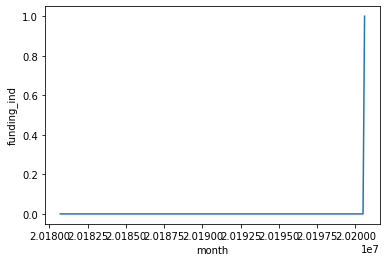

In [64]:
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['funding_ind'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


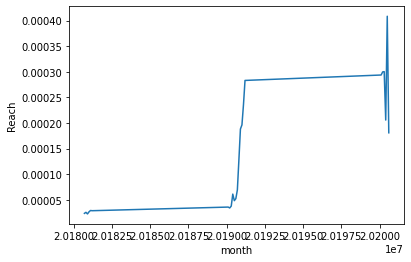

In [67]:
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['Reach'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


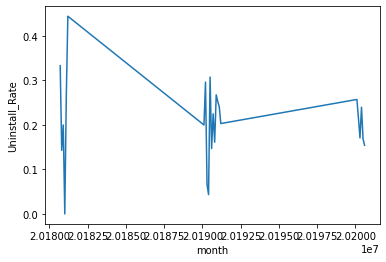

In [69]:
sns.lineplot(funded_startup_1_df['month'], funded_startup_1_df['Uninstall_Rate'])